    Text Mining,
    
    1) Extract reviews of any product from ecommerce website like amazon.
    2) Perform emotion mining.

In [1]:
# Importing the required libraries 

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

import string
import re
#!pip install spacy
#!python -m spacy download en_core_web_sm
import spacy

from nltk import tokenize
#!pip install autoscraper
from autoscraper import AutoScraper
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

### Downloading reviews of the product "Armani Exchange Black Analogue Watch" from Amazon website.

In [2]:
# Giving the url of the amazon product reviews
url = "https://www.amazon.in/Armani-Exchange-Analog-Black-Watch-AX2719/product-reviews/B07Z46CPMQ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
w_list = ["He loved it"]

In [3]:
# Using AutoScraper to scrap the data from the url
scraper = AutoScraper()
data = scraper.build(url,w_list)
print(data)

["An awesome watch to have.The only con being the size of the dial. Could've looked hell lot better with a bit bigger dial.", 'He loved it', 'The media could not be loaded.\n                \n\n\n\n The watch looks great. But as it had to be gifted the packaging was useless.', 'Looks good with excellent quality', 'Loved it', 'Great Looking', 'Loved the product 🖤', 'Watch provided is not the same as shown in the picture.', 'Llego antes del tiempo esperado, en excelentes condiciones, lo volveré a comprar', 'Se lo compré a mi novio y le encantó, la caja está muy deluxe y hasta ahora el reloj  le ha funcionado muy bien.']


In [4]:
data = [x.strip() for x in data] 
data = [x for x in data if x] 
data[1:8]

['He loved it',
 'The media could not be loaded.\n                \n\n\n\n The watch looks great. But as it had to be gifted the packaging was useless.',
 'Looks good with excellent quality',
 'Loved it',
 'Great Looking',
 'Loved the product 🖤',
 'Watch provided is not the same as shown in the picture.']

In [5]:
comment = tokenize.sent_tokenize(" ".join(data))
comment[:10]

['An awesome watch to have.The only con being the size of the dial.',
 "Could've looked hell lot better with a bit bigger dial.",
 'He loved it The media could not be loaded.',
 'The watch looks great.',
 'But as it had to be gifted the packaging was useless.',
 'Looks good with excellent quality Loved it Great Looking Loved the product 🖤 Watch provided is not the same as shown in the picture.',
 'Llego antes del tiempo esperado, en excelentes condiciones, lo volveré a comprar Se lo compré a mi novio y le encantó, la caja está muy deluxe y hasta ahora el reloj  le ha funcionado muy bien.']

In [6]:
# creating dataframe for the comments list
reviews = pd.DataFrame(comment, columns=["Comment"])
reviews.head(10)

,Comment
0,An awesome watch to have.The only con being th...
1,Could've looked hell lot better with a bit big...
2,He loved it The media could not be loaded.
3,The watch looks great.
4,But as it had to be gifted the packaging was u...
5,Looks good with excellent quality Loved it Gre...
6,"Llego antes del tiempo esperado, en excelentes..."


### Performing EDA on the dataframe

In [7]:
# to get the information of the datafile
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  7 non-null      object
dtypes: object(1)
memory usage: 184.0+ bytes


In [8]:
# summarizing the dataframe
reviews.describe()

,Comment
count,7
unique,7
top,An awesome watch to have.The only con being th...
freq,1


In [9]:
# to check the null values of the data
reviews.isnull().sum()

Comment    0
dtype: int64

## Text Preprocessing 

In [10]:
# preprocessing the column 'Comment' from the dataframe

# removing both leading and trailing characters
reviews=[comment.strip() for comment in reviews.Comment]
reviews=[comment for comment in reviews if comment]
# removes empty strings, which are considered as False in Python
reviews[0:10]

['An awesome watch to have.The only con being the size of the dial.',
 "Could've looked hell lot better with a bit bigger dial.",
 'He loved it The media could not be loaded.',
 'The watch looks great.',
 'But as it had to be gifted the packaging was useless.',
 'Looks good with excellent quality Loved it Great Looking Loved the product 🖤 Watch provided is not the same as shown in the picture.',
 'Llego antes del tiempo esperado, en excelentes condiciones, lo volveré a comprar Se lo compré a mi novio y le encantó, la caja está muy deluxe y hasta ahora el reloj  le ha funcionado muy bien.']

In [11]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[:2000]

"An awesome watch to have.The only con being the size of the dial. Could've looked hell lot better with a bit bigger dial. He loved it The media could not be loaded. The watch looks great. But as it had to be gifted the packaging was useless. Looks good with excellent quality Loved it Great Looking Loved the product 🖤 Watch provided is not the same as shown in the picture. Llego antes del tiempo esperado, en excelentes condiciones, lo volveré a comprar Se lo compré a mi novio y le encantó, la caja está muy deluxe y hasta ahora el reloj  le ha funcionado muy bien."

In [12]:
# Removing the punctuations from the string 
punc=reviews_text.translate(str.maketrans('','',string.punctuation)).replace("’", "")
punc[3000:]

''

In [13]:
# Defining a function to remove any kind of emoticons, symbols, flags etc., from the text
import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

no_emoji = remove_emoji(punc)
no_emoji[3000:]

''

In [14]:
# Tokenization
#!pip install -U nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_emoji)
print(text_tokens[0:50])

['An', 'awesome', 'watch', 'to', 'haveThe', 'only', 'con', 'being', 'the', 'size', 'of', 'the', 'dial', 'Couldve', 'looked', 'hell', 'lot', 'better', 'with', 'a', 'bit', 'bigger', 'dial', 'He', 'loved', 'it', 'The', 'media', 'could', 'not', 'be', 'loaded', 'The', 'watch', 'looks', 'great', 'But', 'as', 'it', 'had', 'to', 'be', 'gifted', 'the', 'packaging', 'was', 'useless', 'Looks', 'good', 'with']


In [16]:
# to know the number of tokens
len(text_tokens)

106

In [17]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:200])

['An', 'awesome', 'watch', 'haveThe', 'con', 'size', 'dial', 'Couldve', 'looked', 'hell', 'lot', 'better', 'bit', 'bigger', 'dial', 'He', 'loved', 'media', 'could', 'loaded', 'watch', 'looks', 'great', 'But', 'gifted', 'packaging', 'useless', 'Looks', 'good', 'excellent', 'quality', 'Loved', 'Great', 'Looking', 'Loved', 'product', 'Watch', 'provided', 'shown', 'picture', 'Llego', 'antes', 'del', 'tiempo', 'esperado', 'en', 'excelentes', 'condiciones', 'lo', 'volveré', 'comprar', 'Se', 'lo', 'compré', 'mi', 'novio', 'le', 'encantó', 'la', 'caja', 'está', 'muy', 'deluxe', 'hasta', 'ahora', 'el', 'reloj', 'le', 'ha', 'funcionado', 'muy', 'bien']


In [18]:
# Now, Normalize the data
# changing the words to lowercase
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words[:200])

['an', 'awesome', 'watch', 'havethe', 'con', 'size', 'dial', 'couldve', 'looked', 'hell', 'lot', 'better', 'bit', 'bigger', 'dial', 'he', 'loved', 'media', 'could', 'loaded', 'watch', 'looks', 'great', 'but', 'gifted', 'packaging', 'useless', 'looks', 'good', 'excellent', 'quality', 'loved', 'great', 'looking', 'loved', 'product', 'watch', 'provided', 'shown', 'picture', 'llego', 'antes', 'del', 'tiempo', 'esperado', 'en', 'excelentes', 'condiciones', 'lo', 'volveré', 'comprar', 'se', 'lo', 'compré', 'mi', 'novio', 'le', 'encantó', 'la', 'caja', 'está', 'muy', 'deluxe', 'hasta', 'ahora', 'el', 'reloj', 'le', 'ha', 'funcionado', 'muy', 'bien']


In [19]:
# Performing Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

an awesome watch havethe con size dial couldve looked hell lot better bit bigger dial he loved media could loaded watch looks great but gifted packaging useless looks good excellent quality loved great looking loved product watch provided shown picture llego antes del tiempo esperado en excelentes condiciones lo volveré comprar se lo compré mi novio le encantó la caja está muy deluxe hasta ahora el reloj le ha funcionado muy bien


In [20]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['an', 'awesome', 'watch', 'havethe', 'con', 'size', 'dial', 'could', 've', 'look', 'hell', 'lot', 'well', 'bit', 'big', 'dial', 'he', 'love', 'medium', 'could', 'load', 'watch', 'look', 'great', 'but', 'gifted', 'packaging', 'useless', 'look', 'good', 'excellent', 'quality', 'love', 'great', 'look', 'love', 'product', 'watch', 'provide', 'show', 'picture', 'llego', 'ante', 'del', 'tiempo', 'esperado', 'en', 'excelente', 'condicione', 'lo', 'volveré', 'comprar', 'se', 'lo', 'compré', 'mi', 'novio', 'le', 'encantó', 'la', 'caja', 'está', 'muy', 'deluxe', 'hasta', 'ahora', 'el', 'reloj', 'le', 'ha', 'funcionado', 'muy', 'bien']


In [21]:
# to print clean tweets after joining the words
clean_reviews=' '.join(lemmas)
clean_reviews

'an awesome watch havethe con size dial could ve look hell lot well bit big dial he love medium could load watch look great but gifted packaging useless look good excellent quality love great look love product watch provide show picture llego ante del tiempo esperado en excelente condicione lo volveré comprar se lo compré mi novio le encantó la caja está muy deluxe hasta ahora el reloj le ha funcionado muy bien'

## Feature Extraction using CountVectorizer 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
reviews_cv = cv.fit_transform(lemmas)

print(cv.vocabulary_)

{'an': 1, 'awesome': 3, 'watch': 58, 'havethe': 30, 'con': 11, 'size': 53, 'dial': 16, 'could': 13, 've': 56, 'look': 38, 'hell': 32, 'lot': 39, 'well': 59, 'bit': 6, 'big': 5, 'he': 31, 'love': 40, 'medium': 41, 'load': 37, 'great': 27, 'but': 7, 'gifted': 25, 'packaging': 45, 'useless': 55, 'good': 26, 'excellent': 23, 'quality': 49, 'product': 47, 'provide': 48, 'show': 52, 'picture': 46, 'llego': 35, 'ante': 2, 'del': 14, 'tiempo': 54, 'esperado': 20, 'en': 18, 'excelente': 22, 'condicione': 12, 'lo': 36, 'volvere': 57, 'comprar': 9, 'se': 51, 'compre': 10, 'mi': 42, 'novio': 44, 'le': 34, 'encanto': 19, 'la': 33, 'caja': 8, 'esta': 21, 'muy': 43, 'deluxe': 15, 'hasta': 29, 'ahora': 0, 'el': 17, 'reloj': 50, 'ha': 28, 'funcionado': 24, 'bien': 4}


In [23]:
print(cv.get_feature_names()[50:200])

['reloj', 'se', 'show', 'size', 'tiempo', 'useless', 've', 'volvere', 'watch', 'well']


In [24]:
print(reviews_cv.toarray()[50:200])

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
print(reviews_cv.toarray().shape)

(73, 60)


## Generating Word Cloud 

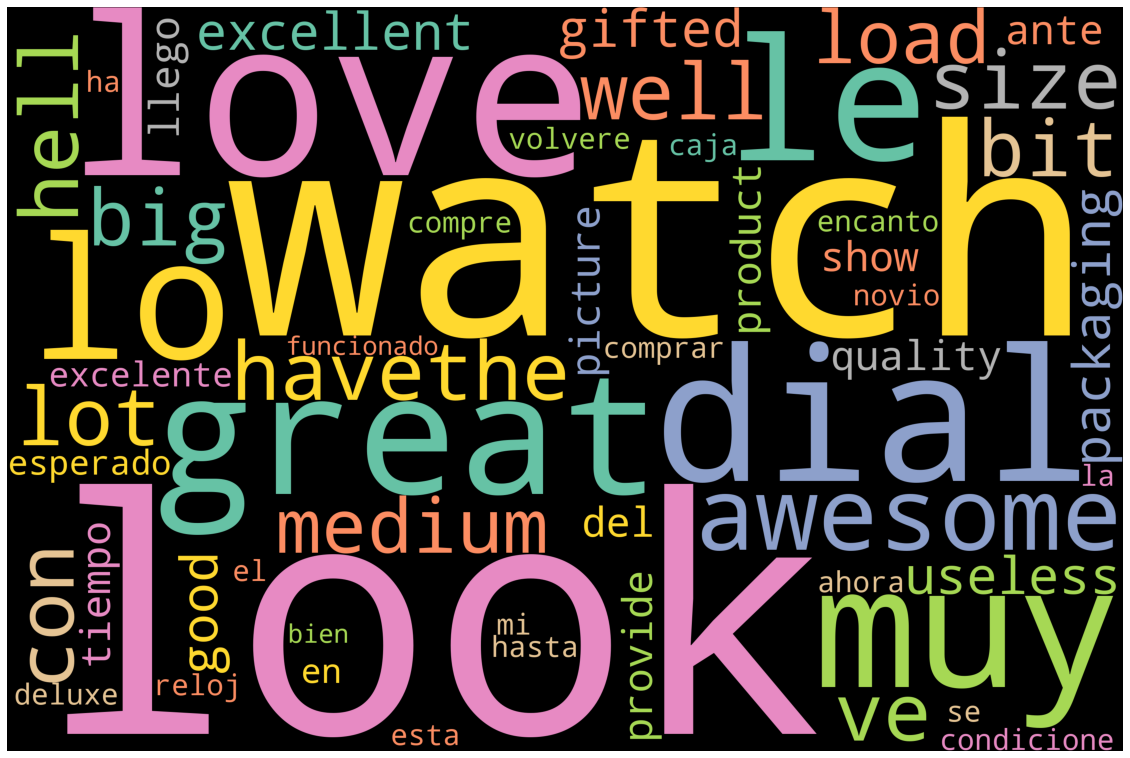

In [26]:
# Defining a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud)
    plt.axis('off')

# To generate the Word Cloud
wordcloud = WordCloud(width=3000,height=2000,background_color='black',max_words=100,
                      colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [27]:
# Parts Of Speech words Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [28]:
for token in doc_block[10:110]:
    print(token,token.pos_)

hell NOUN
lot NOUN
well INTJ
bit NOUN
big ADJ
dial NOUN
he PRON
love VERB
medium NOUN
could AUX
load VERB
watch NOUN
look VERB
great ADJ
but CCONJ
gifted ADJ
packaging NOUN
useless ADJ
look NOUN
good ADJ
excellent ADJ
quality NOUN
love NOUN
great ADJ
look NOUN
love NOUN
product NOUN
watch NOUN
provide VERB
show VERB
picture NOUN
llego PROPN
ante PROPN
del PROPN
tiempo PROPN
esperado PROPN
en PROPN
excelente NOUN
condicione NOUN
lo PROPN
volveré PROPN
comprar PROPN
se PROPN
lo PROPN
compré PROPN
mi PROPN
novio PROPN
le PROPN
encantó VERB
la PROPN
caja PROPN
está VERB
muy PROPN
deluxe PROPN
hasta PROPN
ahora PROPN
el PROPN
reloj PROPN
le PROPN
ha INTJ
funcionado PROPN
muy PROPN
bien PROPN


In [29]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[10:110])

['medium', 'load', 'watch', 'look', 'packaging', 'look', 'quality', 'love', 'look', 'love', 'product', 'watch', 'provide', 'show', 'picture', 'excelente', 'condicione', 'encantó', 'está']


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['Word','Count']
# Viewing top 10 results 
wd_df[0:10]

,Word,Count
0,look,4
1,watch,3
2,love,3
3,dial,2
4,con,1
5,size,1
6,hell,1
7,lot,1
8,bit,1
9,medium,1


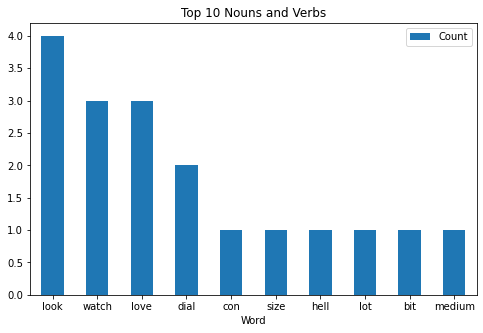

In [31]:
# Visualizing the results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='Word',figsize=(8,5),title='Top 10 Nouns and Verbs',rot=360);

## Sentiment Analysis using Affin

In [32]:
# Emotion Lexicon - Affin
affin = pd.read_csv("Afinn.csv",encoding="Latin1")
affin.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [33]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

affin_score = affin.set_index("word")["value"].to_dict()
take(20, affin_score.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [34]:
'''Creating function; score each word in a sentence in lemmatised form,
   but calculate the score for the whole original sentence'''

nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affin_score

def calculate_sentiment(text: str=None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [35]:
reviews = pd.DataFrame(comment, columns=["Comment"])
reviews.head(10)

,Comment
0,An awesome watch to have.The only con being th...
1,Could've looked hell lot better with a bit big...
2,He loved it The media could not be loaded.
3,The watch looks great.
4,But as it had to be gifted the packaging was u...
5,Looks good with excellent quality Loved it Gre...
6,"Llego antes del tiempo esperado, en excelentes..."


In [36]:
# calculating sentiment score for each sentence
reviews["sentiment_score"] = reviews["Comment"].apply(calculate_sentiment)

# to get the count of words in a sentence
reviews["Word_count"] = reviews["Comment"].str.split().apply(len)
reviews.head()

,Comment,sentiment_score,Word_count
0,An awesome watch to have.The only con being th...,4,13
1,Could've looked hell lot better with a bit big...,-3,10
2,He loved it The media could not be loaded.,3,9
3,The watch looks great.,3,4
4,But as it had to be gifted the packaging was u...,0,11


In [37]:
# Sorting by sentiment_score 
reviews.sort_values(by="sentiment_score")

,Comment,sentiment_score,Word_count
1,Could've looked hell lot better with a bit big...,-3,10
4,But as it had to be gifted the packaging was u...,0,11
6,"Llego antes del tiempo esperado, en excelentes...",2,36
2,He loved it The media could not be loaded.,3,9
3,The watch looks great.,3,4
0,An awesome watch to have.The only con being th...,4,13
5,Looks good with excellent quality Loved it Gre...,9,24


In [38]:
# Discription of the sentiment_score of the whole review
reviews['sentiment_score'].describe()

count    7.000000
mean     2.571429
std      3.690399
min     -3.000000
25%      1.000000
50%      3.000000
75%      3.500000
max      9.000000
Name: sentiment_score, dtype: float64

In [39]:
# to get negative sentiment score of the whole review
reviews[reviews['sentiment_score']<=0].head()

,Comment,sentiment_score,Word_count
1,Could've looked hell lot better with a bit big...,-3,10
4,But as it had to be gifted the packaging was u...,0,11


In [40]:
# to get positive sentiment score of the whole review
reviews[reviews['sentiment_score']>0].head()

,Comment,sentiment_score,Word_count
0,An awesome watch to have.The only con being th...,4,13
2,He loved it The media could not be loaded.,3,9
3,The watch looks great.,3,4
5,Looks good with excellent quality Loved it Gre...,9,24
6,"Llego antes del tiempo esperado, en excelentes...",2,36


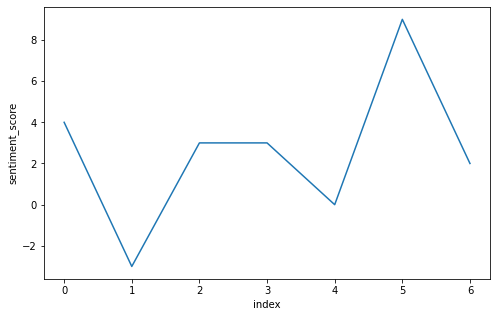

In [41]:
# Plotting the lineplot to get sentiment value of whole review
reviews['index']=range(0,len(reviews))
plt.figure(figsize=(8, 5))
sns.lineplot(y='sentiment_score',x='index',data=reviews);

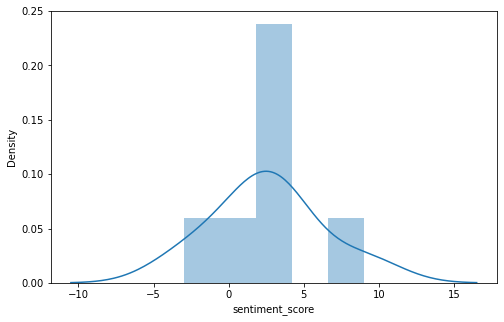

In [42]:
# Plotting the sentiment value for the whole review
plt.figure(figsize=(8,5))
sns.distplot(reviews['sentiment_score']);

## Conclusion:

From the above distplot we can conclude that the number of reviews with negative sentiment score are slightly more than the number of reviews with positive sentiment score.